# 🖼️ **Loading and Displaying an Image using OpenCV**
**OpenCV (Open Source Computer Vision Library)** is a powerful tool for image processing.  
It allows us to **load, modify, and display images** easily.

---

## **🔍 Steps to Load and Display an Image**
### ✅ 1️⃣ Load an Image
- OpenCV provides the `cv2.imread()` function to read an image from disk.
- The image is loaded as a **NumPy array**.

### ✅ 2️⃣ Display an Image
- In local environments, we use `cv2.imshow()`, but it doesn’t work in **Google Colab**.
- Instead, we use **`cv2_imshow()`** from `google.colab.patches`.

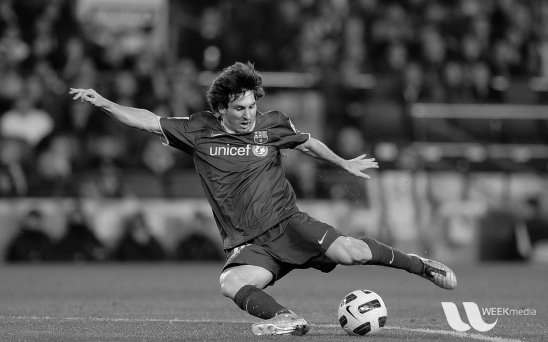

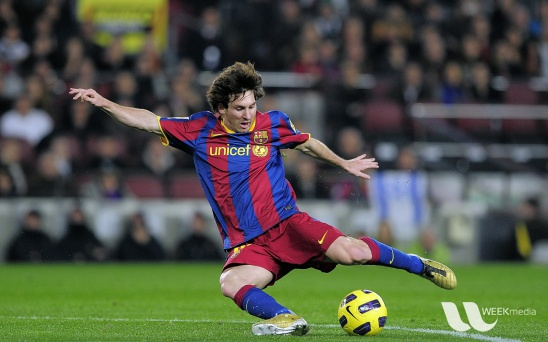

In [2]:
import cv2  # Import the OpenCV library
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images in Google Colab

# Load a color image in grayscale mode (0 means grayscale)
# This converts the original color image to a single-channel grayscale image
img = cv2.imread('messi5.jpg', 0)

# Display the grayscale image (Only works in Google Colab, use cv2.imshow() for local environments)
cv2_imshow(img)

# Load a color image in its original format (default mode)
# The default mode (when no second argument is passed) loads the image as a 3-channel BGR image
# Alternative: Using `-1` instead of `1` would load the image with its alpha channel if available
# img = cv2.imread('messi5.jpg', -1)  # Uncomment this line to load with alpha channel (if present)

img = cv2.imread('messi5.jpg')  # Load image as a color (BGR) image

# Display the color image
cv2_imshow(img)

## **🎨 Understanding Image Formats in OpenCV**
When an image is loaded using `cv2.imread()`, it is stored as a **NumPy array**.  
We can check its properties using:

In [3]:
import cv2

# Load an image
image = cv2.imread('messi5.jpg')

# Print the image properties
print("Data Type:", image.dtype)  # Data type of pixel values (e.g., uint8)
print("Image Shape (Height, Width, Channels):", image.shape)  # Shape of the image
print("Total Pixels:", image.size)  # Total number of elements (pixels * channels)
print("Image Dimensions:", image.ndim)  # Number of dimensions (2 for grayscale, 3 for color)
print("Max Pixel Value:", image.max())  # Maximum intensity value in the image
print("Min Pixel Value:", image.min())  # Minimum intensity value in the image
print("Image Width:", image.shape[1])  # Width of the image
print("Image Height:", image.shape[0])  # Height of the image
print("Number of Channels:", image.shape[2] if len(image.shape) == 3 else 1)  # 3 for color, 1 for grayscale
print("First Pixel Value:", image[0, 0])  # Pixel value at the top-left corner

Data Type: uint8
Image Shape (Height, Width, Channels): (342, 548, 3)
Total Pixels: 562248
Image Dimensions: 3
Max Pixel Value: 255
Min Pixel Value: 0
Image Width: 548
Image Height: 342
Number of Channels: 3
First Pixel Value: [39 43 44]


# 🎨 **Accessing and Modifying Pixel Values in OpenCV**
In OpenCV, images are represented as **NumPy arrays**, where each pixel corresponds to an element in the array.

### 🖼️ **Understanding Pixel Representation**
- **Grayscale images** → Each pixel contains a **single intensity value** (0-255).
- **Color images (BGR)** → Each pixel has **three intensity values** for **Blue, Green, and Red** channels.
- OpenCV loads color images in **BGR format**, not RGB.

In [4]:
import cv2

# Load an image
image = cv2.imread('messi5.jpg')

# Access pixel at (x, y)
x, y = 100, 150
pixel_value = image[y, x]
print(f'Pixel value at ({x}, {y}): {pixel_value}')

# Modify pixel value at (x, y) to red
x, y = 200, 300
image[y, x] = [0, 0, 255]  # BGR value for red

# Save the modified image
cv2.imwrite('modified_example.jpg', image)


Pixel value at (100, 150): [69 69 87]


True

## 🎨 **Accessing a Region of Interest (ROI)**
You can access a **portion** of an image (ROI) using slicing.



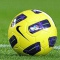

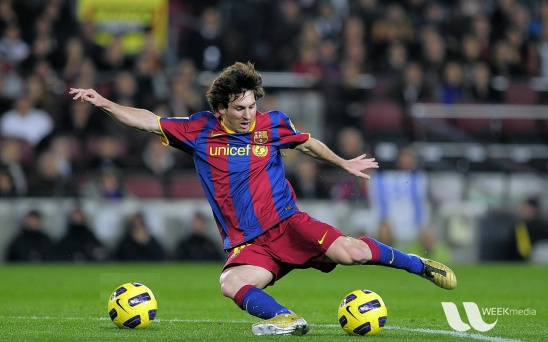

In [5]:
import cv2
from google.colab.patches import cv2_imshow

# Load an image
image = cv2.imread('messi5.jpg')  # OpenCV loads images in BGR format

# Extract a region of interest (ROI) - Selecting the ball
# Slicing the image to select a portion: [start_row:end_row, start_col:end_col]
ball = image[280:340, 330:390]  # Cropping the ball region

# Display the extracted ball portion
cv2_imshow(ball)

# Paste the extracted ball into another location in the image
# This assigns the cropped region to a different part of the image
image[273:333, 100:160] = ball  # Copy the ball to a new position

# Display the modified image with the moved ball
cv2_imshow(image)

# 📊 **Understanding Histograms in Image Processing**
A **histogram** is a graphical representation of the pixel intensity distribution in an image.  
It helps us analyze brightness, contrast, and overall intensity.

---

## 🔍 **What Does a Histogram Show?**
1. **X-Axis (Pixel Intensity)**  
   - Represents pixel values **from 0 to 255**.  
   - **0** = Black (dark pixels), **255** = White (bright pixels).

2. **Y-Axis (Frequency)**  
   - Represents the **number of pixels** with a given intensity.  
   - A higher peak means that intensity appears more frequently.

---

## 📌 **Types of Histograms**
### 1️⃣ **Grayscale Histogram**
- Shows brightness levels in a **grayscale** image.
- 🔹 **Dark images** → More pixels near **0** (left side).
- 🔹 **Bright images** → More pixels near **255** (right side).
- 🔹 **High-contrast images** → Pixels spread across the range.

### 2️⃣ **Color Histogram (BGR)**
- Separate histograms for **Blue, Green, and Red** channels.
- Helps analyze the color composition of an image.



## 📊 **Grayscale Histogram**
📌 **Load an image and compute its histogram in grayscale.**  

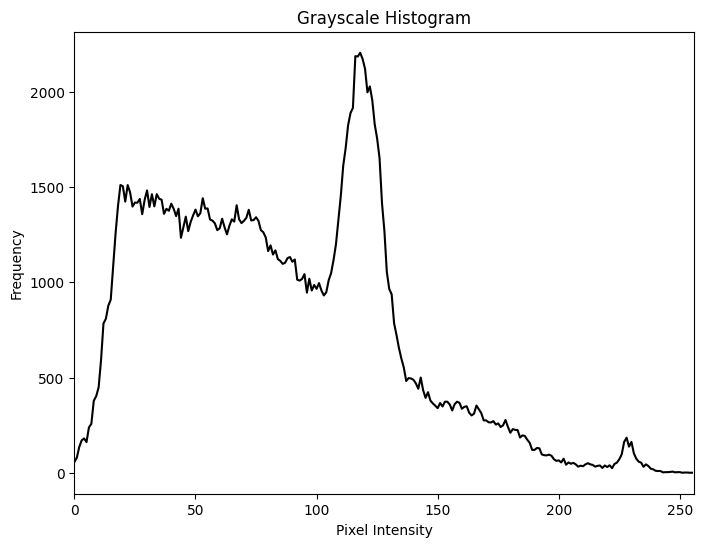

In [7]:
import cv2
import numpy as np  # Import NumPy for numerical operations
import matplotlib.pyplot as plt  # Import Matplotlib for visualization

# Load the image in grayscale mode
image = cv2.imread('messi5.jpg', 0)  # '0' loads image in grayscale

# Compute the histogram using cv2.calcHist()
# Parameters: [image], [channel], [mask], [histSize], [ranges]
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Plot the histogram
plt.figure(figsize=(8, 6))  # Set figure size
plt.title("Grayscale Histogram")  # Set title
plt.xlabel("Pixel Intensity")  # X-axis label
plt.ylabel("Frequency")  # Y-axis label
plt.plot(histogram, color='black')  # Plot histogram in black color
plt.xlim([0, 256])  # Set X-axis limit (pixel intensity range)
plt.show()  # Show the plot

## 📊 **Color Histogram (BGR)**
📌 **Now, let's compute histograms for each channel (Blue, Green, and Red).**  

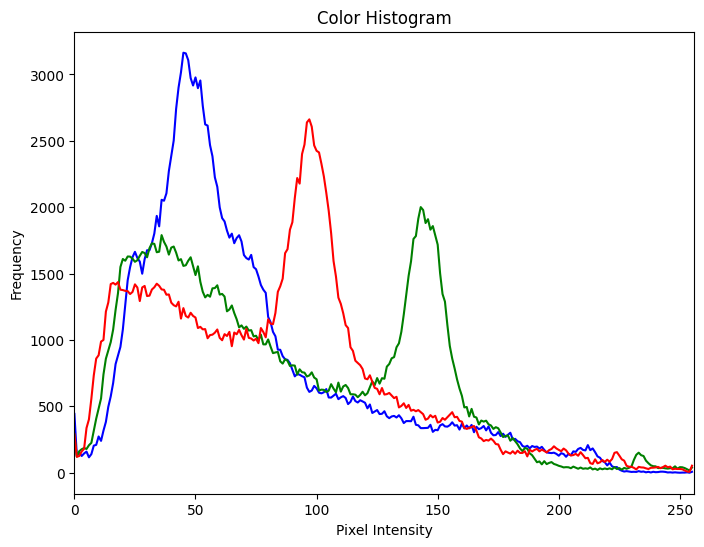

In [8]:
# Load the image in color
image_color = cv2.imread('messi5.jpg')

# Define color names for visualization
colors = ('blue', 'green', 'red')

# Create a plot for histograms
plt.figure(figsize=(8, 6))
plt.title("Color Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Calculate and plot histogram for each channel (B, G, R)
for i, color in enumerate(colors):
    hist = cv2.calcHist([image_color], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)  # Plot each channel with its respective color
    plt.xlim([0, 256])  # Set X-axis range

plt.show()  # Show the histogram

# 🎨 **Point Operators in Image Processing**
Point operators modify **individual pixel values** without considering neighboring pixels.  
They are widely used for **contrast enhancement, brightness correction, and image transformation**.

## 📌 **Applying Digital Negative**

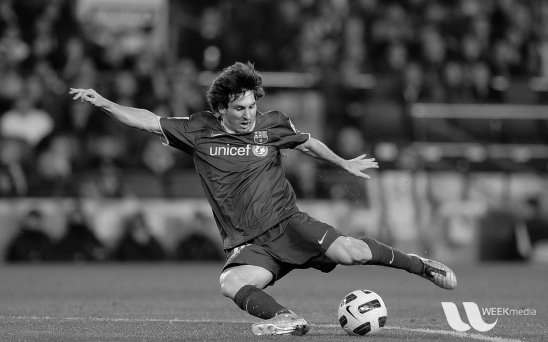

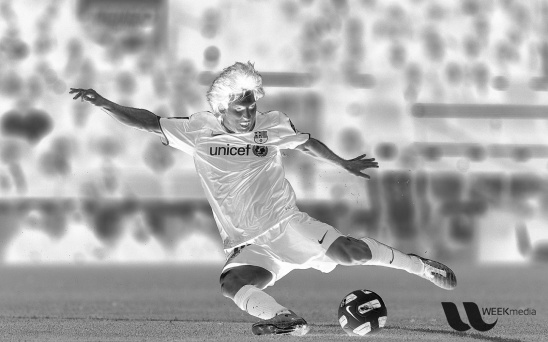

In [9]:
import cv2
from google.colab.patches import cv2_imshow

x = cv2.imread('messi5.jpg', 0)
cv2_imshow(x)

#digital negative
y = 255-x
cv2_imshow(y)

## 📌 **Applying Gamma Correction**

In [17]:
# import the necessary packages
import numpy as np
from google.colab.patches import cv2_imshow
import cv2


def adjust_gamma_lookup(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

def adjust_gamma(image, gamma=1.0):
	invGamma = 1.0 / gamma
	return np.array((image / 255.0) ** invGamma * 255, dtype=np.uint8)


# load the original image
original = cv2.imread('dog.png', 1)

# loop over various values of gamma
for gamma in np.arange(0.0, 3.5, 0.5):
	# ignore when gamma is 1 (there will be no change to the image)
	if gamma == 1:
		continue

	# apply gamma correction and show the images
	gamma = gamma if gamma > 0 else 0.1
	adjusted = adjust_gamma(original, gamma=gamma)
	cv2.putText(adjusted, "g={}".format(gamma), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
	cv2_imshow(np.hstack([original, adjusted]))

Output hidden; open in https://colab.research.google.com to view.

## 📌 **Applying Histogram Equalization**

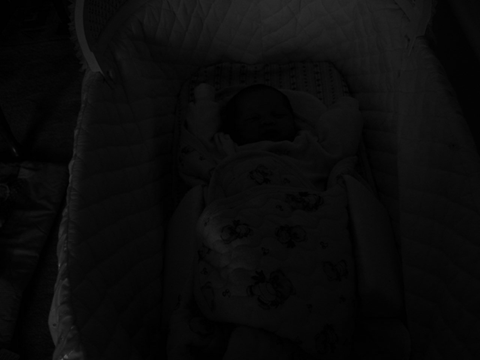

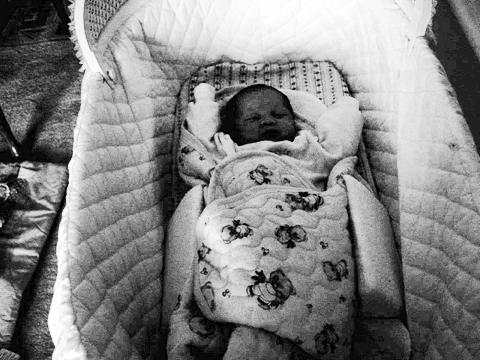

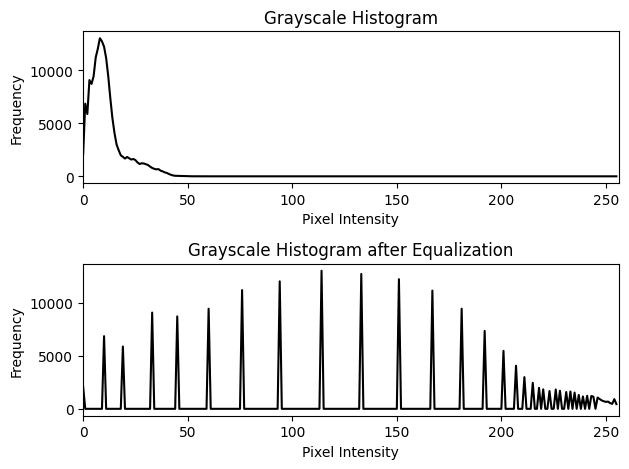

In [23]:
import cv2
import numpy as np

# Histogram equalization example
# Load test image
img = cv2.cvtColor(cv2.imread('baby.png'), cv2.COLOR_BGR2GRAY)

# Perform histogram equalization
eqImg = cv2.equalizeHist(img)

# Show images
cv2_imshow(img)
cv2_imshow(eqImg)
cv2.imwrite('Histogram_Equalization_eqImg.png', eqImg)

plt.figure(1)
plt.subplot(211)
histogram = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.title("Grayscale Histogram")  # Set title
plt.xlabel("Pixel Intensity")  # X-axis label
plt.ylabel("Frequency")  # Y-axis label
plt.plot(histogram, color='black')  # Plot histogram in black color
plt.xlim([0, 256])  # Set X-axis limit (pixel intensity range)


plt.subplot(212)
histogram = cv2.calcHist([eqImg], [0], None, [256], [0, 256])
plt.title("Grayscale Histogram after Equalization")  # Set title
plt.xlabel("Pixel Intensity")  # X-axis label
plt.ylabel("Frequency")  # Y-axis label
plt.plot(histogram, color='black')  # Plot histogram in black color
plt.xlim([0, 256])  # Set X-axis limit (pixel intensity range)

plt.tight_layout()
plt.show()


# 🌈 **Converting Color Spaces in OpenCV**
In OpenCV, we can convert images between different color spaces using `cv2.cvtColor()`.

### 🎨 **Common Color Conversions**
| Conversion | OpenCV Code |
|------------|------------|
| BGR → Grayscale | `cv2.COLOR_BGR2GRAY` |
| BGR → RGB | `cv2.COLOR_BGR2RGB` |
| BGR → HSV | `cv2.COLOR_BGR2HSV` |
| BGR → LAB | `cv2.COLOR_BGR2LAB` |

## 📌 **Convert an Image to Different Color Spaces**


In [24]:
import cv2
from google.colab.patches import cv2_imshow

# Load an image
image = cv2.imread('messi5.jpg')  # OpenCV loads images in BGR format

# Convert to Grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert to RGB (for correct display in Matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to HSV (Hue, Saturation, Value)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 🔄 **Resizing Images in OpenCV**
Resizing an image changes its **width and height** while maintaining its content.  
In OpenCV, we use `cv2.resize()` for resizing.

---

## 📌 **How to Resize an Image?**
The `cv2.resize()` function takes:
- `dsize`: The **new size** (width, height) of the image.
- `fx` and `fy`: The **scale factors** for resizing.
- `interpolation`: The **method** used for resizing.

### 🔹 **Interpolation Methods**
| Method | OpenCV Code | Use Case |
|--------|------------|----------|
| **Nearest Neighbor** | `cv2.INTER_NEAREST` | Fastest, low-quality |
| **Bilinear** | `cv2.INTER_LINEAR` | Default, good for upscaling |
| **Bicubic** | `cv2.INTER_CUBIC` | Better quality than linear |
| **Lanczos** | `cv2.INTER_LANCZOS4` | Best quality for high scaling |

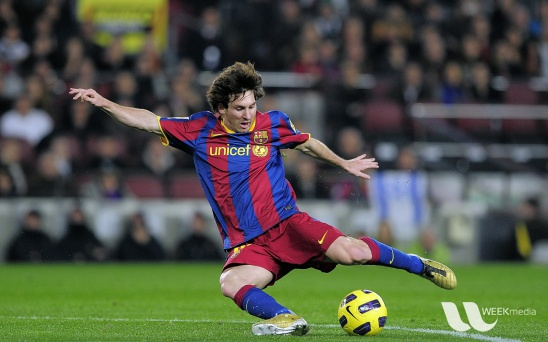

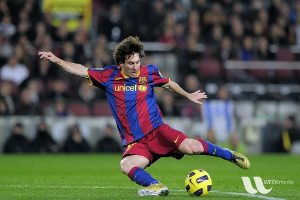

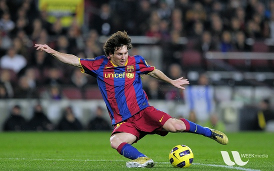

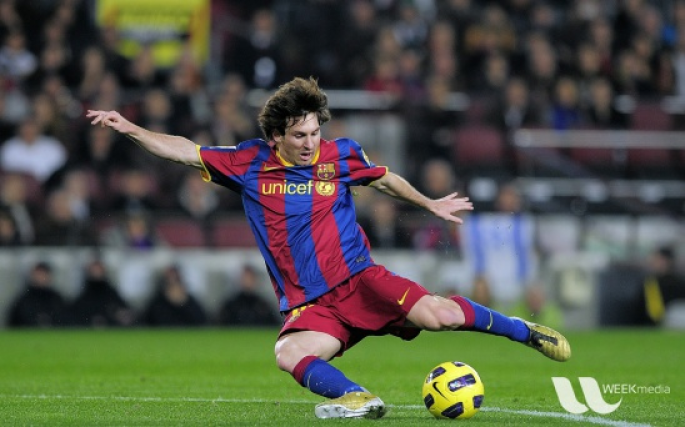

In [25]:
import cv2
from google.colab.patches import cv2_imshow

# Load an image
image = cv2.imread('messi5.jpg')

# Resize using fixed dimensions (width=300, height=200)
resized_fixed = cv2.resize(image, (300, 200), interpolation=cv2.INTER_LINEAR)

# Resize using scale factors (half the original size)
resized_scaled = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_CUBIC)

# Display original and resized images
cv2_imshow(image)  # Original Image
cv2_imshow(resized_fixed)  # Resized with fixed dimensions
cv2_imshow(resized_scaled)  # Resized with scale factors

# Resize image to 25% of its original size
width = int(image.shape[1] * 1.25)
height = int(image.shape[0] * 1.25)
dim = (width, height)

resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
cv2_imshow(resized_image)

# 🔄 **Geometric Transformations in OpenCV**
Geometric transformations allow us to **modify the position, orientation, or perspective** of an image.  
In OpenCV, common transformations include:
- **Translation** (Moving the image)
- **Rotation** (Turning the image)
- **Affine Transformation** (Scaling, rotating, and shearing)
- **Perspective Transformation** (Changing the viewpoint)


## 📌 **1️⃣ Translation (Shifting an Image)**
Translation moves an image in the **x and y directions**.  
We use a **transformation matrix** `M = [[1, 0, tx], [0, 1, ty]]`, where:
- `tx` = Shift along X-axis
- `ty` = Shift along Y-axis

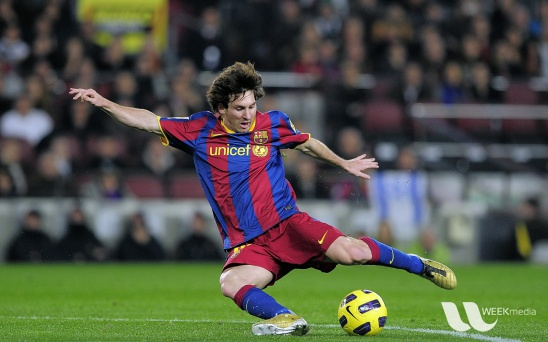

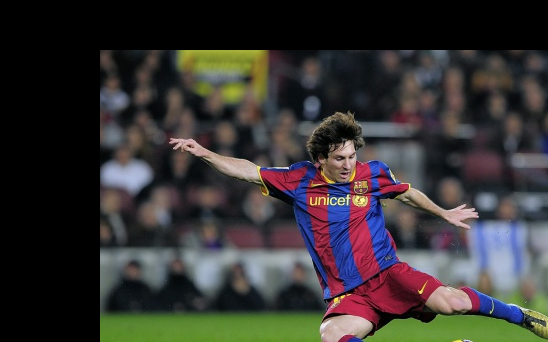

In [26]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Load an image
image = cv2.imread('messi5.jpg')

# Define translation matrix (Move right by 100 pixels, down by 50 pixels)
M = np.float32([[1, 0, 100], [0, 1, 50]])

# Apply translation
translated_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

# Display images
cv2_imshow(image)  # Original

cv2_imshow(translated_image)  # Translated Image


## 📌 **2️⃣ Rotation**
Rotation **turns** the image by a specified angle around a center point.

### 📌 **Formula for Rotation Matrix**
M = cv2.getRotationMatrix2D(center, angle, scale)
- `center`: Point to rotate around.
- `angle`: Rotation angle (in degrees).
- `scale`: Resizing factor (1.0 = same size).


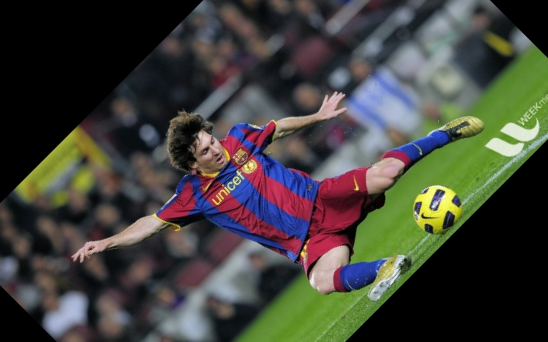

In [27]:
# Define rotation matrix (Rotate 45° around the center)
(h, w) = image.shape[:2]
center = (w // 2, h // 2)  # Image center
M = cv2.getRotationMatrix2D(center, 45, 1.0)

# Apply rotation
rotated_image = cv2.warpAffine(image, M, (w, h))

# Display images
cv2_imshow(rotated_image)

## 📌 **3️⃣ Affine Transformation**
Affine transformations **scale, rotate, or shear** an image.  
It requires **three points** in the original and transformed image.

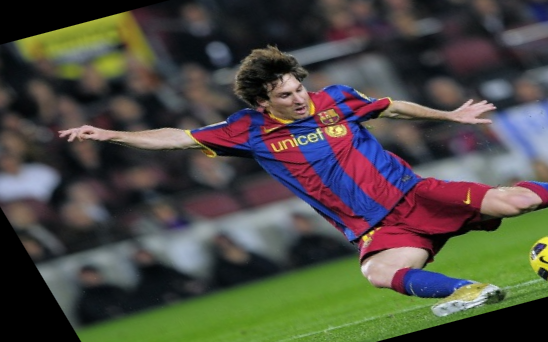

In [28]:
# Define three points in the original image
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])

# Define corresponding points in the transformed image
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

# Compute affine transformation matrix
M = cv2.getAffineTransform(pts1, pts2)

# Apply transformation
affine_image = cv2.warpAffine(image, M, (w, h))

# Display image
cv2_imshow(affine_image)

## 📌 **4️⃣ Perspective Transformation**
Perspective transformation changes the **viewpoint** of an image.  
It requires **four points** to compute a transformation matrix.

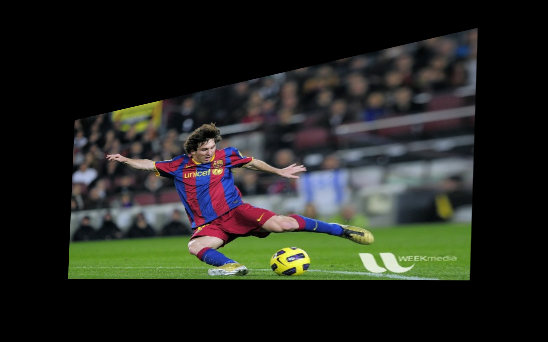

In [29]:
# Define four points from the original image
pts1 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])

# Define four points in the output image
pts2 = np.float32([[100, 145], [300, 100], [80, 300], [310, 310]])

# Compute perspective transformation matrix
M = cv2.getPerspectiveTransform(pts1, pts2)

# Apply perspective transformation
perspective_image = cv2.warpPerspective(image, M, (w, h))

# Display images
cv2_imshow(perspective_image)

# 🎯 **Convolution in OpenCV**
**Convolution** is a fundamental operation in image processing.  
It applies a **filter (kernel)** to an image to enhance, blur, sharpen, or detect edges.

---

## 📌 **What is Convolution?**
Convolution involves:
1. **Sliding a kernel (filter)** over an image.
2. **Computing the weighted sum** of pixel values under the kernel.
3. **Replacing the center pixel** with the computed value.

---

## 🛠️ **Common Filters (Kernels)**
| Filter Type | Kernel | Effect |
|-------------|--------|--------|
| **Identity** | `[[0, 0, 0], [0, 1, 0], [0, 0, 0]]` | No change |
| **Box Blur** | `[[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]]` | Blurring |
| **Gaussian Blur** | Computed dynamically | Smooth blurring |
| **Sharpening** | `[[0, -1, 0], [-1, 5, -1], [0, -1, 0]]` | Enhances edges |
| **Edge Detection** | `[[1, 0, -1], [0, 0, 0], [-1, 0, 1]]` | Detects edges |

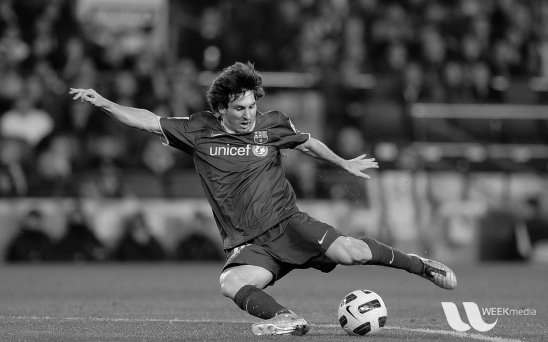

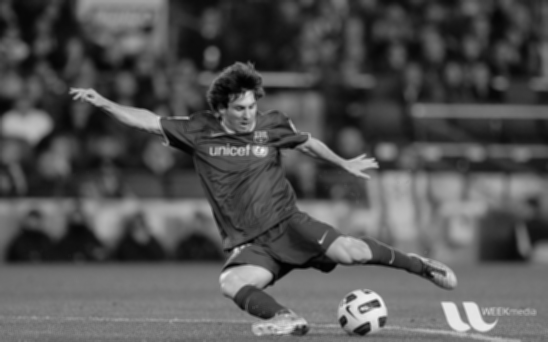

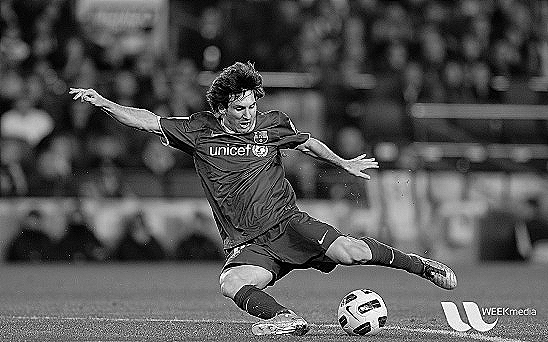

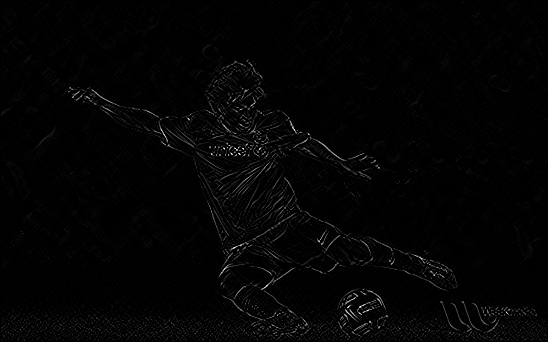

In [32]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Load an image in grayscale
image = cv2.imread('messi5.jpg', cv2.IMREAD_GRAYSCALE)

# Define different kernels
identity_kernel = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]], dtype=np.float32)
blur_kernel = np.ones((3, 3), np.float32) / 9  # Box Blur
sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=np.float32)
edge_kernel = np.array([[1, 0, -1], [0, 0, 0], [-1, 0, 1]], dtype=np.float32)  # Edge Detection

# Apply kernels using cv2.filter2D
identity = cv2.filter2D(image, -1, identity_kernel)
blur = cv2.filter2D(image, -1, blur_kernel)
sharpen = cv2.filter2D(image, -1, sharpen_kernel)
edge = cv2.filter2D(image, -1, edge_kernel)

# Display results
cv2_imshow(image)  # Original Image

cv2_imshow(blur)  # Blurred Image

cv2_imshow(sharpen)  # Sharpened Image

cv2_imshow(edge)  # Edge Detection



# 📊 Gaussian and Median Blurring

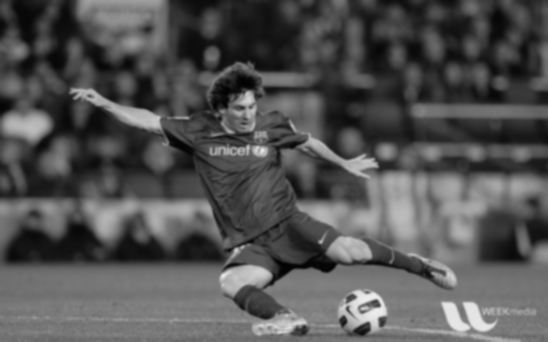

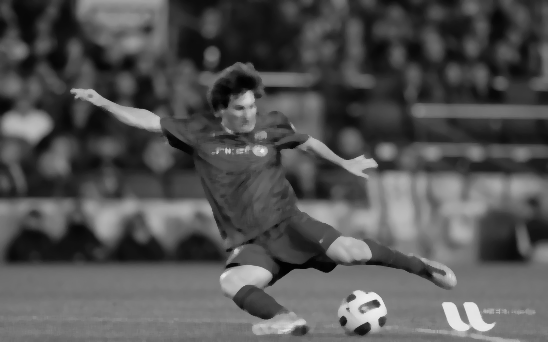

In [33]:
# Apply Gaussian Blur (5x5 kernel)
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
# Apply Median Blur (removes noise)
median_blur = cv2.medianBlur(image, 5)
# Display results
cv2_imshow(gaussian_blur)
cv2_imshow(median_blur)


## 📌 **Applying Morphological Operations**

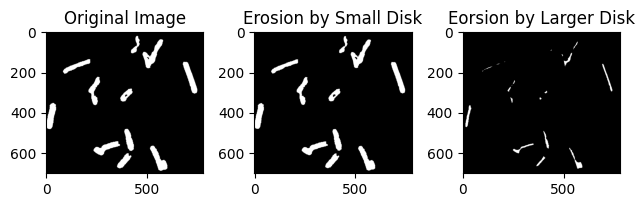

In [36]:
import cv2
from matplotlib import pyplot as plt

# Load test image
img = cv2.imread('bacteria.png')

# Perform dilation with small disk
se1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
BW1 = cv2.erode(img, se1, iterations=1)

# Perform dilation with larger disk
se2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
BW2 = cv2.erode(img, se2, iterations=1)

# Show images
plt.subplot(131)
plt.imshow(img)
plt.title('Original Image')


plt.subplot(132)
plt.imshow(BW1)
plt.title('Erosion by Small Disk')

plt.subplot(133)
plt.imshow(BW2)
plt.title('Eorsion by Larger Disk')

plt.tight_layout()
plt.show()

# 🔍 **SIFT Descriptors and Feature Matching in OpenCV**
The **Scale-Invariant Feature Transform (SIFT)** is a widely used technique for:

✔ Detecting keypoints in an image  
✔ Extracting distinctive feature descriptors  
✔ Matching features between two images  

## **🔹 Why Use SIFT?**
✔ **Scale-invariant** – Works at different image sizes  
✔ **Rotation-invariant** – Detects the same features even when rotated  
✔ **Robust to illumination changes** – Handles different lighting conditions  
✔ **Used in object recognition, panorama stitching, and image retrieval**

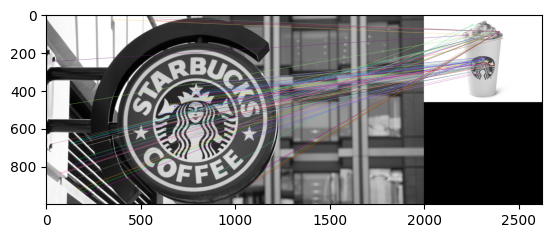

True

In [38]:
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('example1.jpg', 0)
img2 = cv2.imread('example2.jpg', 0)

sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
(kps1, descs1) = sift.detectAndCompute(img1, None)
(kps2, descs2) = sift.detectAndCompute(img2, None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(descs1, descs2, k=2)

#Find the 2 nearest neighbors for a given descriptor. Let d1 be the distance to the nearest neighbor and d2 be the distance to the next one.
#In order to accept the nearest neighbor as a "match", d1/d2 ratio should be smaller than a given threshold.
#The motivation behind this test is that we expect a good match to be much closer to the query feature than the second best match.
# Because if both features are similarly close to the query, we cannot decide which one is really the best one.

# Apply ratio test
good = []
for m, n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1, kps1, img2, kps2, good, None, flags=2)
plt.imshow(img3), plt.show()
cv2.imwrite('img3.jpg', img3)

# 📄 **Document Scanner using OpenCV**
A **document scanner** processes an image of a document and converts it into a **clean, readable, and well-formatted** scanned version.

---

## 🔹 **Steps in Document Scanning**
1️⃣ **Preprocessing** – Convert image to grayscale and detect edges.  
2️⃣ **Contour Detection** – Identify the largest rectangular shape (document boundary).  
3️⃣ **Perspective Transformation** – Apply a **top-down view** to correct perspective distortions.  
4️⃣ **Thresholding & Enhancement** – Improve readability by applying binarization.  

STEP 1: Edge Detection


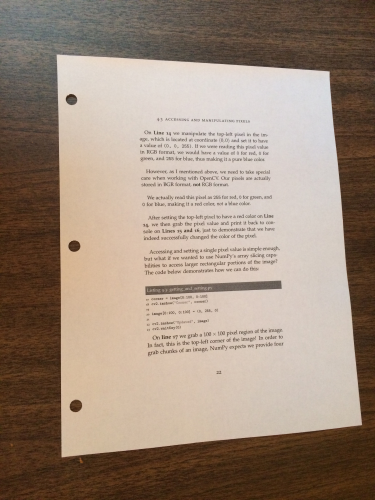

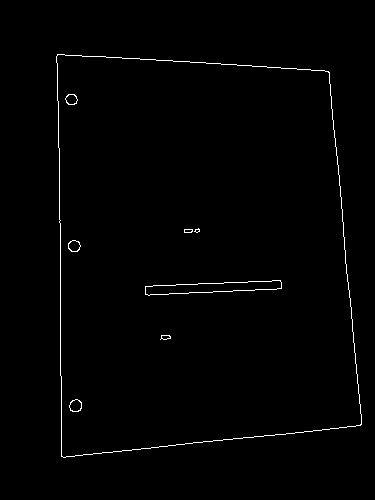

STEP 2: Find contours of paper


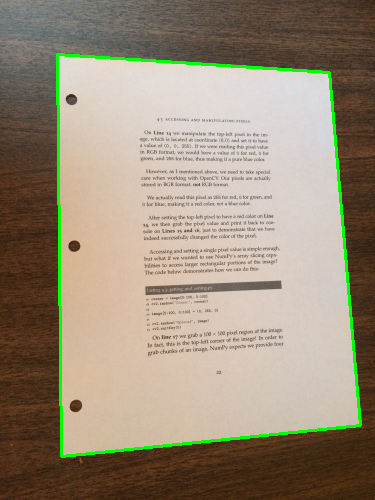

STEP 3: Apply perspective transform


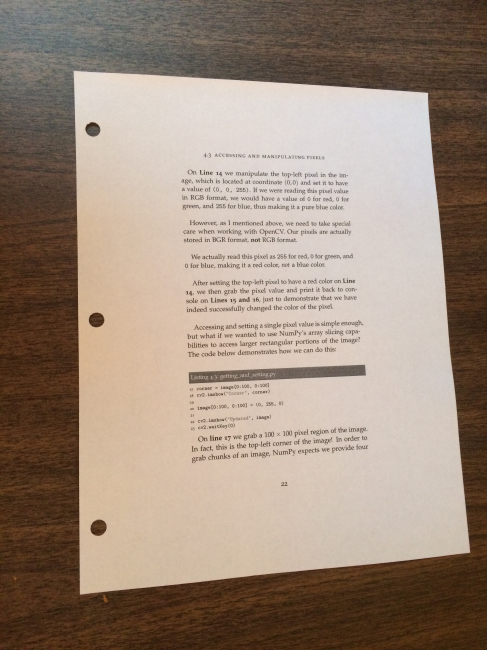

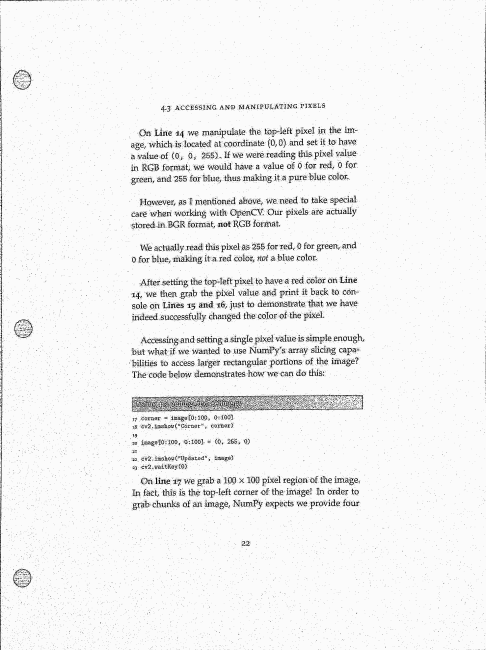

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow  # For displaying images in Colab

def resize(image, width=None, height=None, inter=cv2.INTER_AREA):
	# initialize the dimensions of the image to be resized and
	# grab the image size
	dim = None
	(h, w) = image.shape[:2]

	# if both the width and height are None, then return the
	# original image
	if width is None and height is None:
		return image

	# check to see if the width is None
	if width is None:
		# calculate the ratio of the height and construct the
		# dimensions
		r = height / float(h)
		dim = (int(w * r), height)

	# otherwise, the height is None
	else:
		# calculate the ratio of the width and construct the
		# dimensions
		r = width / float(w)
		dim = (width, int(h * r))

	# resize the image
	resized = cv2.resize(image, dim, interpolation=inter)

	# return the resized image
	return resized


def order_points(pts):
	# initialzie a list of coordinates that will be ordered
	# such that the first entry in the list is the top-left,
	# the second entry is the top-right, the third is the
	# bottom-right, and the fourth is the bottom-left
	rect = np.zeros((4, 2), dtype="float32")

	# the top-left point will have the smallest sum, whereas
	# the bottom-right point will have the largest sum
	s = pts.sum(axis=1)
	rect[0] = pts[np.argmin(s)]
	rect[2] = pts[np.argmax(s)]

	# now, compute the difference between the points, the
	# top-right point will have the smallest difference,
	# whereas the bottom-left will have the largest difference
	diff = np.diff(pts, axis=1)
	rect[1] = pts[np.argmin(diff)]
	rect[3] = pts[np.argmax(diff)]

	# return the ordered coordinates
	return rect


def four_point_transform(image, pts):
	# obtain a consistent order of the points and unpack them
	# individually
	rect = order_points(pts)
	(tl, tr, br, bl) = rect

	# compute the width of the new image, which will be the
	# maximum distance between bottom-right and bottom-left
	# x-coordiates or the top-right and top-left x-coordinates
	widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
	widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
	maxWidth = max(int(widthA), int(widthB))

	# compute the height of the new image, which will be the
	# maximum distance between the top-right and bottom-right
	# y-coordinates or the top-left and bottom-left y-coordinates
	heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
	heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
	maxHeight = max(int(heightA), int(heightB))

	# now that we have the dimensions of the new image, construct
	# the set of destination points to obtain a "birds eye view",
	# (i.e. top-down view) of the image, again specifying points
	# in the top-left, top-right, bottom-right, and bottom-left
	# order
	dst = np.array([
		[0, 0],
		[maxWidth - 1, 0],
		[maxWidth - 1, maxHeight - 1],
		[0, maxHeight - 1]], dtype="float32")

	# compute the perspective transform matrix and then apply it
	M = cv2.getPerspectiveTransform(rect, dst)
	warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

	# return the warped image
	return warped

# load the image and compute the ratio of the old height
# to the new height, clone it, and resize it
image = cv2.imread("page.jpg")
ratio = image.shape[0] / 500.0
orig = image.copy()
image = resize(image, height=500)

# convert the image to grayscale, blur it, and find edges
# in the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 75, 200)

# show the original image and the edge detected image
print("STEP 1: Edge Detection")
cv2_imshow(image)
cv2_imshow(edged)


# find the contours in the edged image, keeping only the
# largest ones, and initialize the screen contour
cnts, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:5]

# loop over the contours
for c in cnts:
	# approximate the contour
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)

	# if our approximated contour has four points, then we
	# can assume that we have found our screen
	if len(approx) == 4:
		screenCnt = approx
		break

# show the contour (outline) of the piece of paper
print("STEP 2: Find contours of paper")
cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
cv2_imshow(image)

# apply the four point transform to obtain a top-down
# view of the original image
warped = four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)

# convert the warped image to grayscale, then threshold it
# to give it that 'black and white' paper effect
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
warped = cv2.adaptiveThreshold(warped, 251, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5, 2)
#warped = warped.astype("uint8") * 255

# show the original and scanned images
print("STEP 3: Apply perspective transform")
cv2_imshow(resize(orig, height=650))
cv2_imshow(resize(warped, height=650))
